# Lab Assignment 1



### Hwayeon Kang, s2245661

## Task 1

Use `SymPy` to solve the differential equation $y' = (2y-3y^2)\sin(x)$, with $y(0)=0.5$, and plot the solution.

The equation


has solutions


with initial condition y(0)=0.5: 


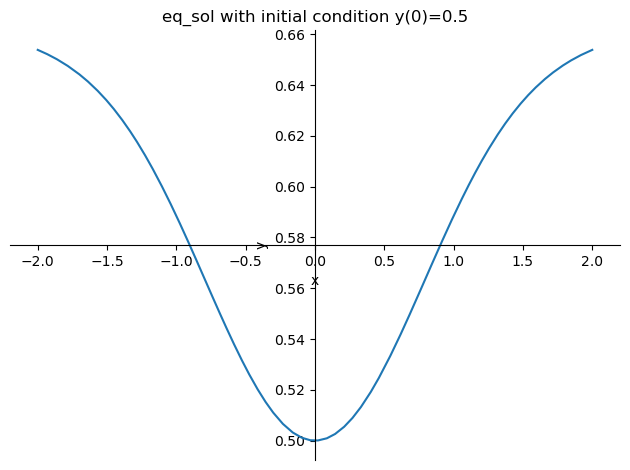

In [8]:
# Setup
import sympy as sym
from sympy import sin
sym.init_printing()
import sympy.plotting as sym_plot
from IPython.display import display_latex

x = sym.symbols('x')
y = sym.Function('y')
eq = sym.Eq(y(x).diff(x), (2*y(x)-3*y(x)**2)*sin(x))
print("The equation")
display_latex(eq)

# Solve the equation
eq_sol = sym.dsolve(eq, y(x))
print("has solutions")
display_latex(sym.simplify(eq_sol))

eq_sol_init = sym.dsolve(eq, y(x), ics={y(0):0.5})
print("with initial condition y(0)=0.5: ")
display_latex(sym.simplify(eq_sol_init))

# Plotting
sym_plot.plot(eq_sol_init.rhs, (x,-2,2), xlabel = 'x', ylabel = 'y', title = 'eq_sol with initial condition y(0)=0.5')

## Task 2

Use `SciPy`'s `odeint` function to solve the system of equations

\begin{align*}
\frac{dx}{dt}&=xy -2.1x \\ \frac{dy}{dt} &= 0.8y - 0.4xy
\end{align*}

Produce a plot of the solutions for $0\leq t\leq 20$ with initial conditions $x(0)=0.5$ and $y(0) \in \{1, 3, 5, \ldots, 19\}$.

How many curves do you expect to see plotted?

Qualitatively, what happens to the solution, $(x(t),y(t))$, as $y(0)$ becomes large?

<IPython.core.display.Javascript object>


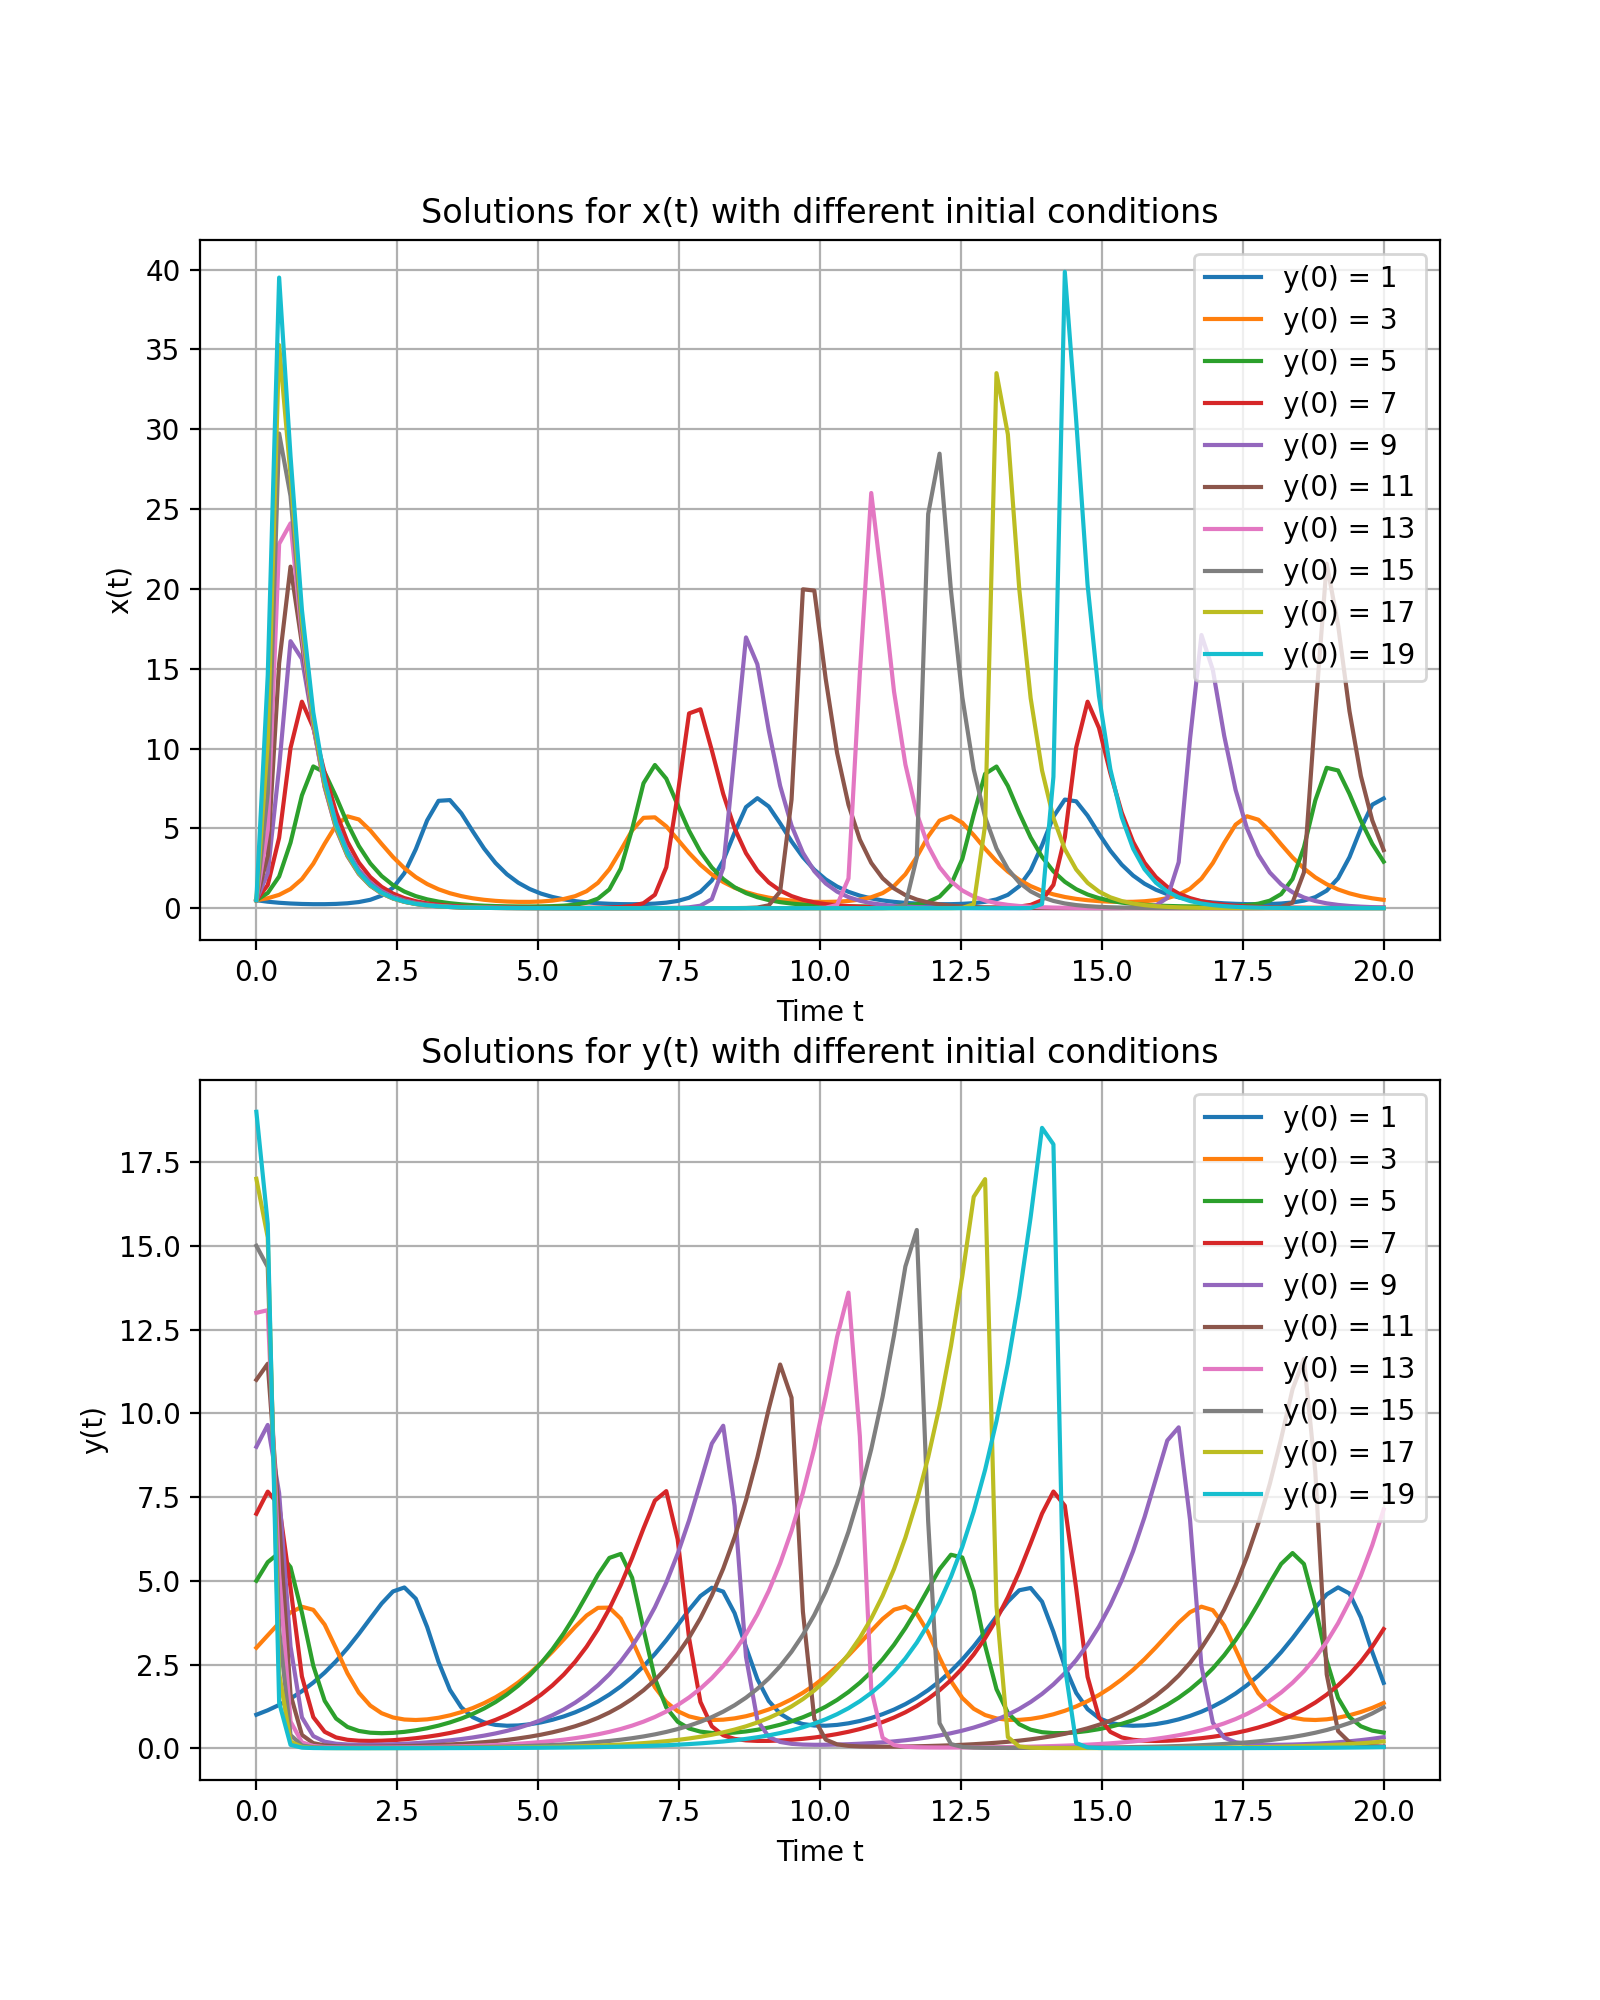

In [18]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(variables, t):
    x = variables[0]  # x(t)
    y = variables[1]  # y(t)
    dxdt = x * y - 2.1 * x
    dydt = 0.8 * y - 0.4 * x * y
    return [dxdt, dydt]

# Initial conditions
x0 = 0.5
y0_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Set up the time samples
t = np.linspace(0, 20, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Solve and Plot
for y0 in y0_values:
    initial_conditions = [x0, y0]

    sol = odeint(system, initial_conditions, t)

    x_solution = sol[:, 0]
    y_solution = sol[:, 1]
    
    ax1.plot(t, x_solution, label=f'y(0) = {y0}')
    ax2.plot(t, y_solution, label=f'y(0) = {y0}')

# Set x(t) plot
ax1.set_xlabel('Time t')
ax1.set_ylabel('x(t)')
ax1.set_title('Solutions for x(t) with different initial conditions')
ax1.grid()
ax1.legend(loc='best')

# Set y(t) plot
ax2.set_xlabel('Time t')
ax2.set_ylabel('y(t)')
ax2.set_title('Solutions for y(t) with different initial conditions')
ax2.grid()
ax2.legend(loc='best')

plt.show()

I expected to see 10 curves for both $x(t)$ and $y(t)$, as we have 10 initial conditions for $y(0)$. As anticipated, I can see 10 curves for each.

As $y(0)$ increases, the solutions $(x(t),y(t))$ show larger and higher peaks followed by strong oscillations. The amplitude of these oscillations increases with $y(0)$, and the system takes longer to settle. It becomes more dynamically active as $y(0)$ grows.